In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load the data
df = pd.read_csv("deliveries.csv")

In [36]:
df.head()

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


In [37]:
df.drop_duplicates(inplace = True)

In [38]:
df.dropna(inplace = True)

In [39]:
df.isnull().sum()

match_no            0
date                0
stage               0
venue               0
batting_team        0
bowling_team        0
innings             0
over                0
striker             0
bowler              0
runs_of_bat         0
extras              0
wide                0
legbyes             0
byes                0
noballs             0
wicket_type         0
player_dismissed    0
fielder             0
dtype: int64

# Top 10 Batsmen by Runs with Strike Rate (Min 100 balls faced)

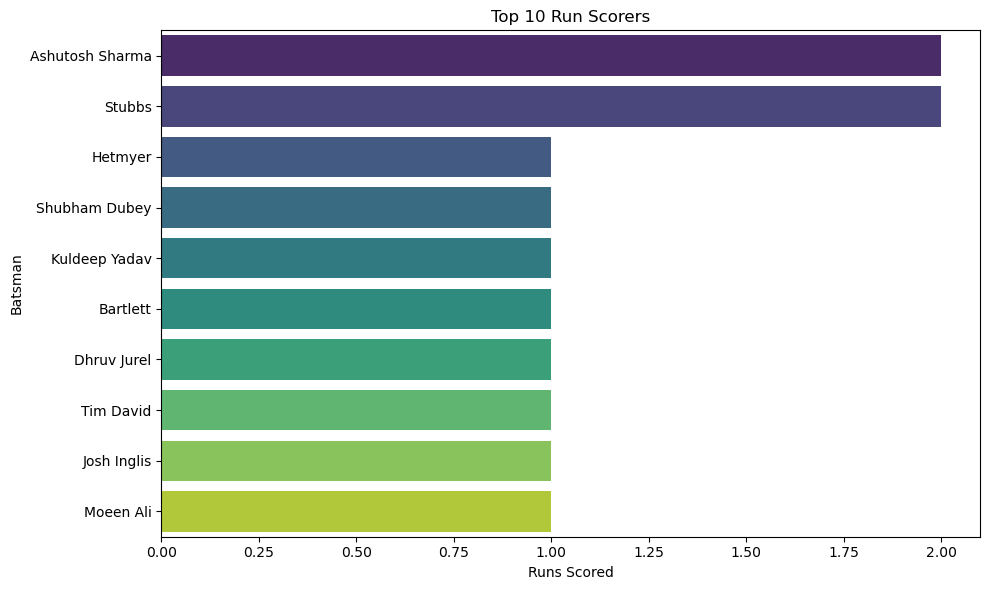

In [49]:
top_batsmen = (
    df.groupby("striker")["runs_of_bat"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_batsmen, x="runs_of_bat", y="striker", palette="viridis")
plt.title("Top 10 Run Scorers")
plt.xlabel("Runs Scored")
plt.ylabel("Batsman")
plt.tight_layout()


#  Top 10 Wicket Takers

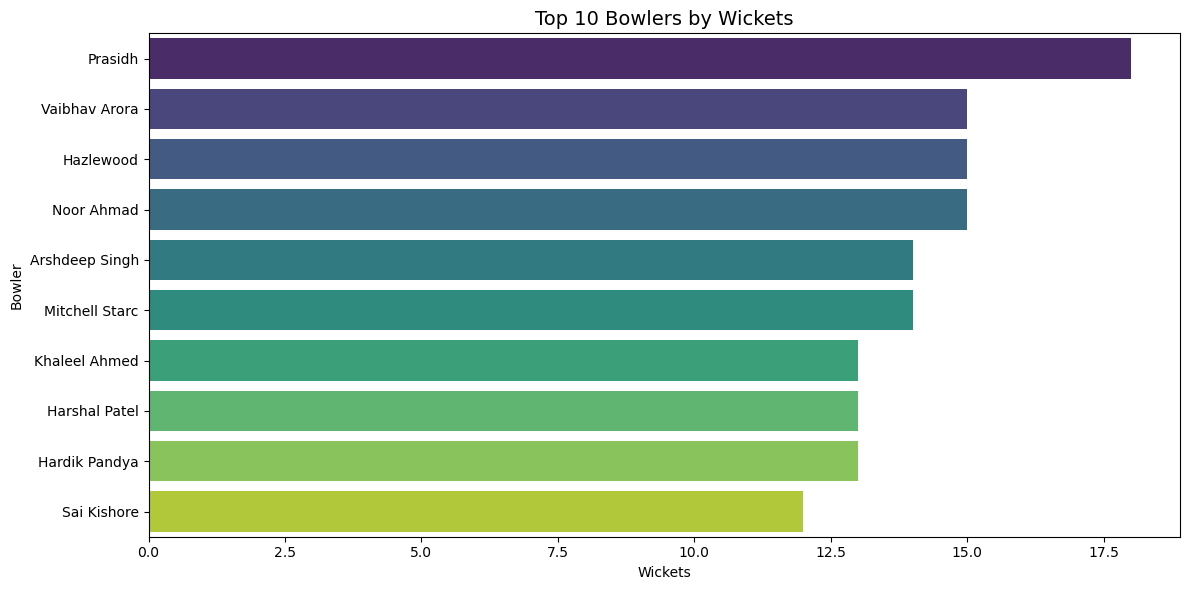

In [41]:
# Filter out rows with a valid dismissal and non-null bowler
valid_wickets = df[df['wicket_type'].notna() & df['bowler'].notna()]

# Count number of wickets per bowler
bowler_wickets = valid_wickets.groupby('bowler').agg(
    wickets=('player_dismissed', 'count')
).reset_index()

# Get top 10 bowlers
top_bowlers = bowler_wickets.sort_values(by='wickets', ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_bowlers,
    x='wickets',
    y='bowler',
    palette='viridis'
)
plt.title('Top 10 Bowlers by Wickets', fontsize=14)
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()


#  Run Scoring by Match Phase

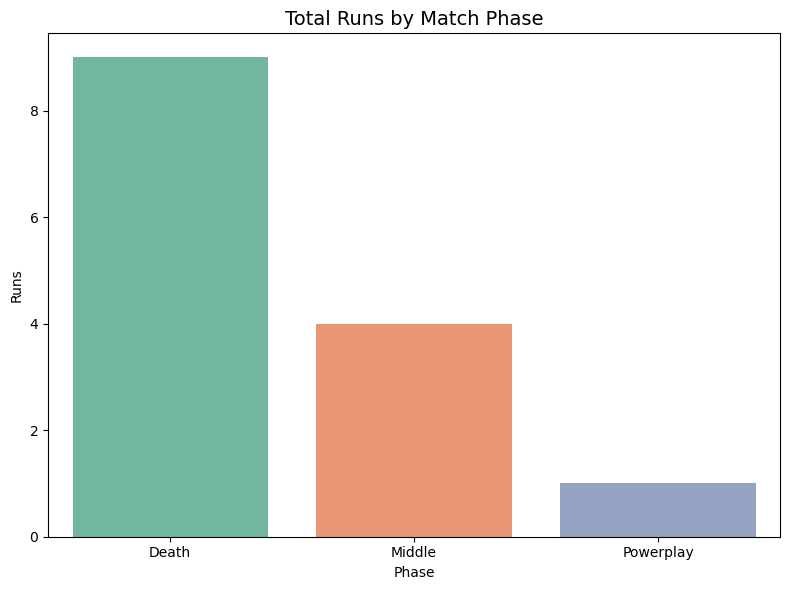

In [43]:
def label_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

df['phase'] = df['over'].apply(label_phase)

# Total runs per phase
phase_runs = df.groupby('phase')['runs_of_bat'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=phase_runs, x='phase', y='runs_of_bat', palette='Set2')
plt.title('Total Runs by Match Phase', fontsize=14)
plt.xlabel('Phase')
plt.ylabel('Runs')
plt.tight_layout()
plt.show()


# Phase-wise Run Comparison per Team

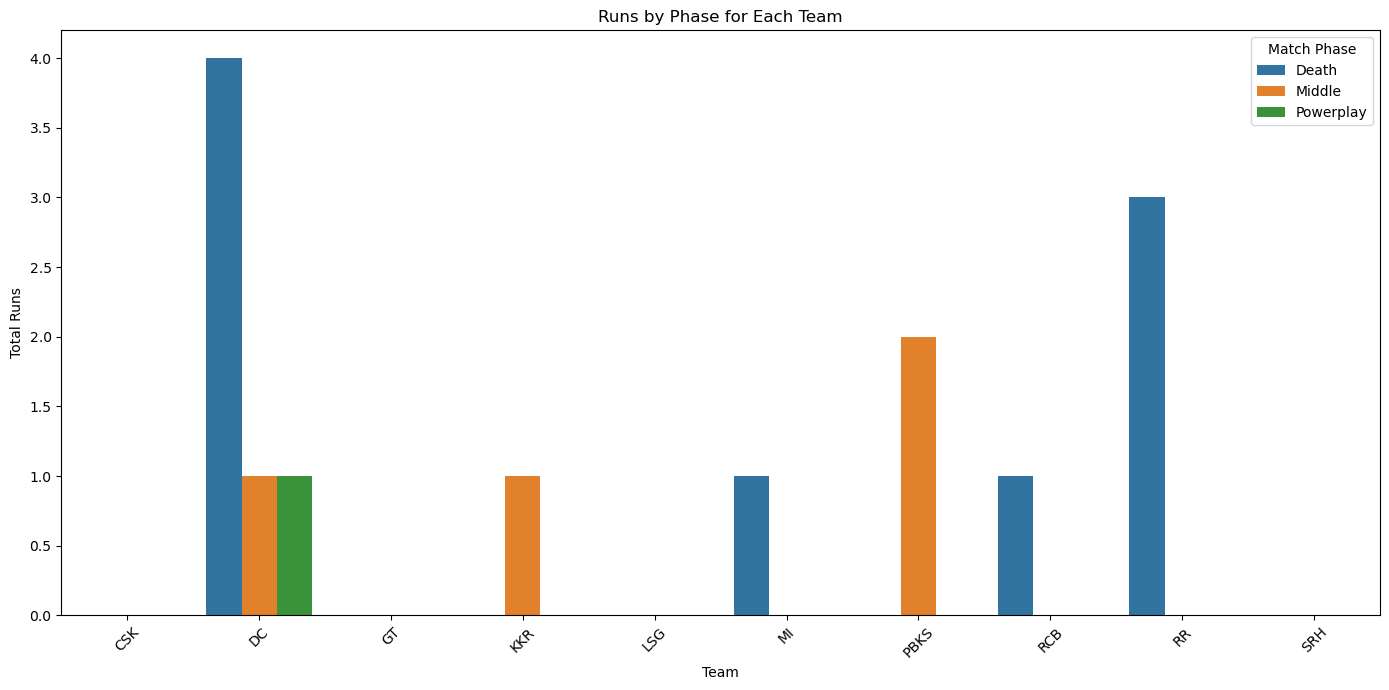

In [44]:
# Assign phase
df['phase'] = df['over'].apply(lambda x: 'Powerplay' if x < 6 else ('Middle' if x < 16 else 'Death'))

# Total runs per team per phase
team_phase_runs = df.groupby(['batting_team', 'phase'])['runs_of_bat'].sum().reset_index()

# Plot: Phase-wise runs for each team
plt.figure(figsize=(14, 7))
sns.barplot(data=team_phase_runs, x='batting_team', y='runs_of_bat', hue='phase')
plt.title('Runs by Phase for Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(title='Match Phase')
plt.tight_layout()
plt.show()

# Venue Analysis

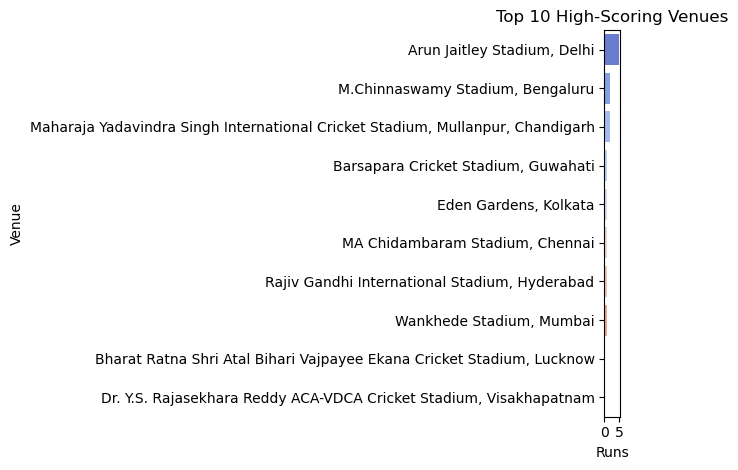

In [45]:
venue_runs = df.groupby("venue")["runs_of_bat"].sum().sort_values(ascending=False).reset_index().head(10)

sns.barplot(data=venue_runs, x="runs_of_bat", y="venue", palette="coolwarm")
plt.title("Top 10 High-Scoring Venues")
plt.xlabel("Runs")
plt.ylabel("Venue")
plt.tight_layout()

# Team scoring trends: Average runs per innings

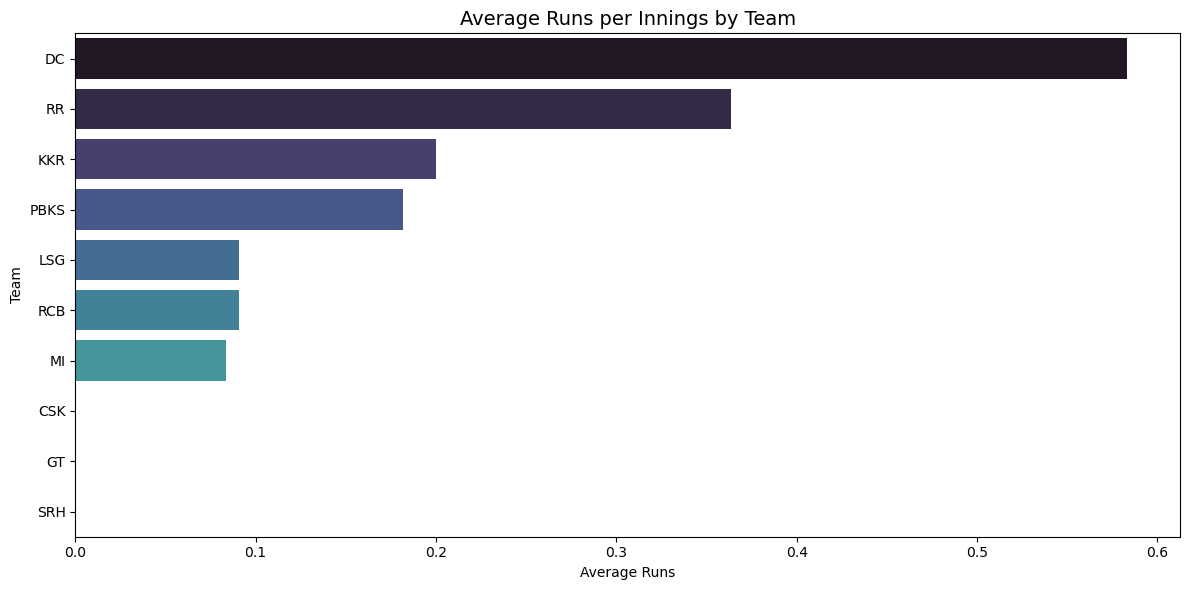

In [46]:
# Calculate total runs per match per innings per team
df['total_runs'] = df['runs_of_bat'] + df['extras']
team_innings_runs = df.groupby(['match_no', 'batting_team', 'innings']).agg(
    total_runs=('total_runs', 'sum')
).reset_index()

# Average runs per innings per team
team_avg_runs = team_innings_runs.groupby('batting_team').agg(
    avg_runs=('total_runs', 'mean')
).reset_index().sort_values(by='avg_runs', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(
    data=team_avg_runs,
    x='avg_runs',
    y='batting_team',
    palette='mako'
)
plt.title('Average Runs per Innings by Team', fontsize=14)
plt.xlabel('Average Runs')
plt.ylabel('Team')
plt.tight_layout()
plt.show()

# Dismissal Types by Bowler

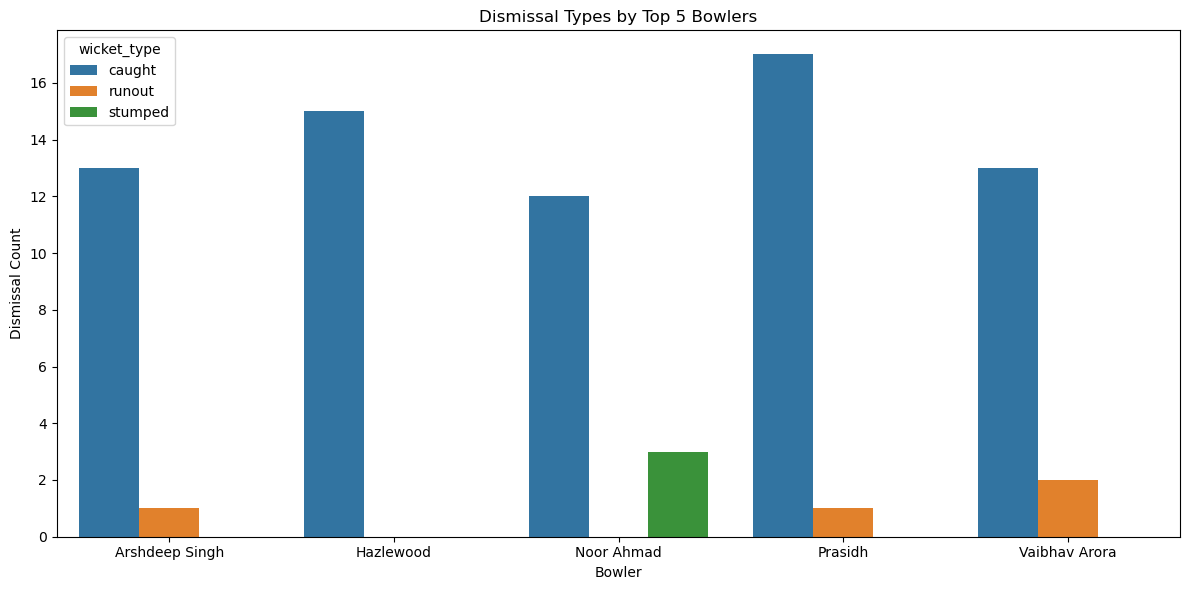

In [47]:
# Filter valid dismissals
dismissals = df[df['wicket_type'].notna()]

# Count dismissals by bowler and type
dismissal_type = dismissals.groupby(['bowler', 'wicket_type']).size().reset_index(name='count')

# Top 5 bowlers with most dismissals (to limit chart size)
top_bowlers = dismissal_type.groupby('bowler')['count'].sum().nlargest(5).index
filtered = dismissal_type[dismissal_type['bowler'].isin(top_bowlers)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x='bowler', y='count', hue='wicket_type', palette='tab10')
plt.title('Dismissal Types by Top 5 Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Dismissal Count')
plt.tight_layout()
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>